# Amtrak Routes for HQTA

Looks like Amtrak is back in our scheduled data, because `regional_feed_type = None` again.

Keep:
* Pacific Surfliner
* San Joaquins
* Coast Starlight
* Capitol Corridor

Do not keep (too much outside CA):
* California Zephyr
* Sunset Limited

In [1]:
import geopandas as gpd
import pandas as pd

from segment_speed_utils import helpers
from shared_utils import rt_dates

In [2]:
analysis_date = rt_dates.DATES["mar2024"]

shapes = helpers.import_scheduled_shapes(
    analysis_date,
    columns = ["shape_array_key", "geometry"],
    crs = "EPSG:4326",
    get_pandas = True
)  

shapes.shape

(6411, 2)

<AxesSubplot:>

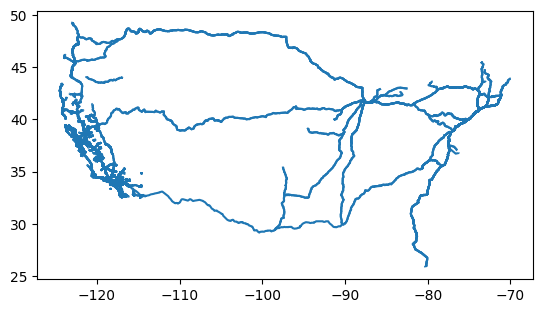

In [3]:
shapes.plot()

In [4]:
trips = helpers.import_scheduled_trips(
    analysis_date,
    columns = ["name", "shape_array_key", "route_id", 
               "route_short_name", "route_long_name", 
              "regional_feed_type"],
    get_pandas = True
)

In [5]:
amtrak_trips = trips[trips.name=="Amtrak Schedule"]

In [6]:
amtrak_trips.regional_feed_type.value_counts()

Series([], Name: regional_feed_type, dtype: int64)

In [7]:
amtrak_trips2 = pd.merge(
    shapes,
    amtrak_trips,
    on = "shape_array_key",
    how = "inner"
)

In [8]:
amtrak_trips2.route_short_name.unique()

array([None], dtype=object)

<AxesSubplot:>

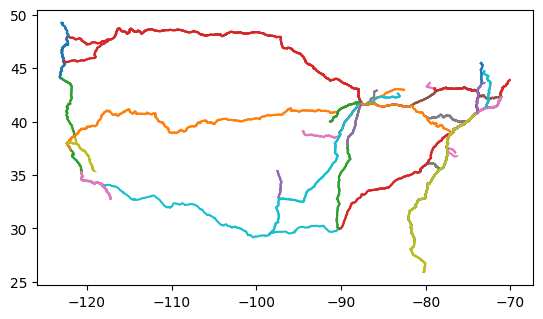

In [9]:
amtrak_trips2.plot("route_long_name")

<AxesSubplot:>

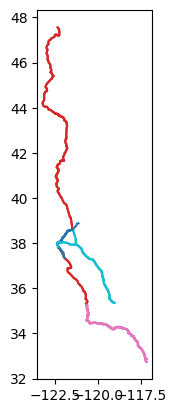

In [10]:
ca_amtrak = ["Pacific Surfliner", "San Joaquins", 
             "Coast Starlight", "Capitol Corridor"
                ]
amtrak_trips2[
    amtrak_trips2.route_long_name.isin(ca_amtrak)
].plot("route_long_name")